## י 📌 הסחר בין הטיה לשונות $(Bias-Variance Tradeoff)$ ברגרסיה י  

## **📌 י מבוא י**  
י כאשר אנו משתמשים במודלים סטטיסטיים ולמידת מכונה כדי לבצע חיזוי, עלינו להבין את **הסחר בין הטיה לשונות $(Bias-Variance Tradeoff)$**. י  
י זהו מושג קריטי המשפיע על **דיוק התחזיות** ומסביר מדוע לעיתים מודל מסובך **אינו עדיף על פני מודל פשוט יותר**. י  

📌 **י מהי מטרת החיזוי? י**  
י המטרה היא **למצוא פונקציה $\hat{f}(X)$ שתתאים באופן מיטבי למערכת הקשר בין המשתנים הבלתי תלויים $(X)$ למשתנה התלוי $(Y)$**. י  

י הקשר הכללי מבוטא כך: י  
$$
Y = f (X) + \varepsilon
$$

י כאשר: י  
- **י $f(X)$** היא הפונקציה האמיתית שאנו מנסים להעריך. י  
- **י $\varepsilon$** הוא משתנה מקרי **עם תוחלת 0 ושונות $\sigma^2_{\varepsilon}$** – רעש בלתי נמנע. י  

---

## **📌 י מהי טעות הריבועים הממוצעת $(Mean Squared Error - MSE)$? י**  
י כדי למדוד **עד כמה המודל שלנו טוב**, אנו משתמשים ב-**טעות הריבועים הממוצעת $(MSE)$** בנקודה ספציפית $x_0$: י  

$$
MSE(x_0) = E \left[ (Y - \hat{f}(x_0))^2 | X = x_0 \right]
$$

י לאחר פירוק מתמטי, ניתן להציג את ה-$MSE$ כך: י  

$$
MSE(x_0) = \sigma^2_{\varepsilon} + Bias^2(\hat{f}(x_0)) + Var(\hat{f}(x_0))
$$

🔹 **י מסקנה קריטית:** י  
**י הטעות הממוצעת הכוללת מורכבת משלושה חלקים:** י  
1. **י $\sigma^2_{\varepsilon}$** → **שגיאה בלתי ניתנת להפחתה** (הנובעת מהנתונים עצמם). י  
2. **י $Bias^2(\hat{f}(x_0))$** → **הטיה** – עד כמה התחזית שלנו רחוקה מהערך האמיתי. י  
3. **י $Var(\hat{f}(x_0))$** → **שונות** – עד כמה המודל רגיש לשינויים בנתונים. י  

📌 **י המטרה היא למצוא איזון בין הטיה ושונות, כדי למזער את $MSE(x_0)$. י**  

---

## **📌 י הבנה אינטואיטיבית של $Bias$ ו-$Variance$ י**  
| **י מאפיין י** | **י הטיה $(Bias)$ י** | **י שונות $(Variance)$ י** |
|------------|----------------|----------------|
| **י הגדרה י** | ההבדל בין המודל שלנו לאמת | כמה המודל משתנה בין דגימות |
| **י מודלים עם הטיה גבוהה י** | רגרסיה ליניארית פשוטה | $KNN$ עם $K$ גדול |
| **י מודלים עם שונות גבוהה י** | רגרסיה פולינומית מסדר גבוה | $KNN$ עם $K=1$ |
| **י תוצאה י** | למידת חסר $(Underfitting)$ | למידת יתר $(Overfitting)$ |

---

## **📌 י השפעת $k$ ברגרסיית $K$-Nearest Neighbors י**  
י בקירוב $k$ שכנים, ה-$MSE$ מתפרק כך: י  

$$
MSE(x_0) = \sigma^2_{\varepsilon} + \left( f(x_0) - \frac{1}{k} \sum_{l=1}^{k} f(x_l) \right)^2 + \frac{\sigma^2_{\varepsilon}}{k}
$$

- י כאשר **$k$ קטן**, המודל **יכול להתאים את עצמו טוב יותר** (טיה נמוכה) אך רגיש לרעש (שונות גבוהה). י  
- י ככל ש-$k$ **גדל**, אנו עושים **החלקה** של הנתונים, מה שמקטין שונות אך מעלה הטיה. י  

🔹 **י ההחלטה על $k$ קובעת את איזון $Bias-Variance$ במודל $KNN$. י**  


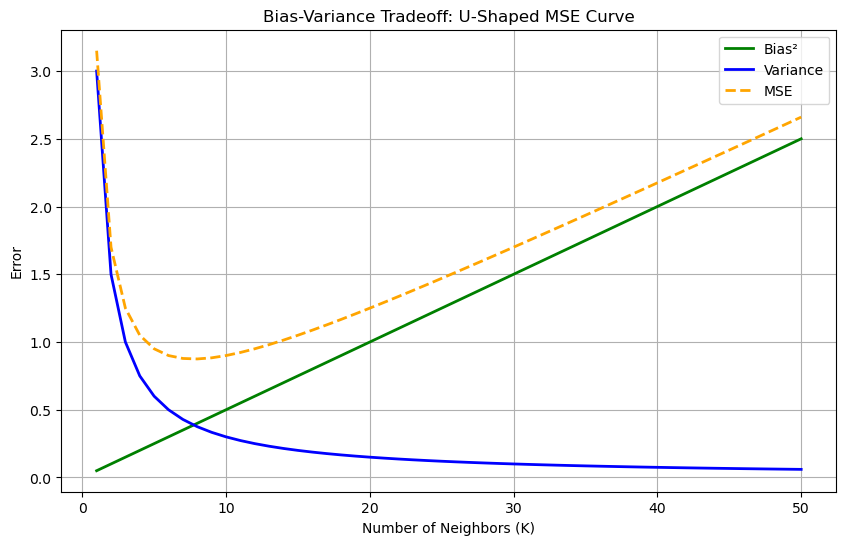

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# טווח ערכים עבור k
k_values = np.arange(1, 51)

# הגדרת פרמטרים שיוצרים U-Shape מובהק
# ככל ש-k גדול, ההטיה (Bias^2) גדלה
# ככל ש-k קטן, השונות (Variance) גדולה
c_bias = 0.05
c_var = 3.0

# Bias^2 - גדל עם k
bias_squared = c_bias * k_values

# Variance - יורד עם k
variance = c_var / k_values

# שגיאה בלתי ניתנת להפחתה
irreducible_error = 0.1

# חישוב ה-MSE
mse = bias_squared + variance + irreducible_error

# יצירת הגרף
plt.figure(figsize=(10, 6))
plt.plot(k_values, bias_squared, label="Bias²", color="green", linewidth=2)
plt.plot(k_values, variance, label="Variance", color="blue", linewidth=2)
plt.plot(k_values, mse, label="MSE", color="orange", linestyle="dashed", linewidth=2)

# עיצוב הגרף
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff: U-Shaped MSE Curve")
plt.legend()
plt.grid(True)
plt.show()


# הוכחה על נתונים סינטתיים 

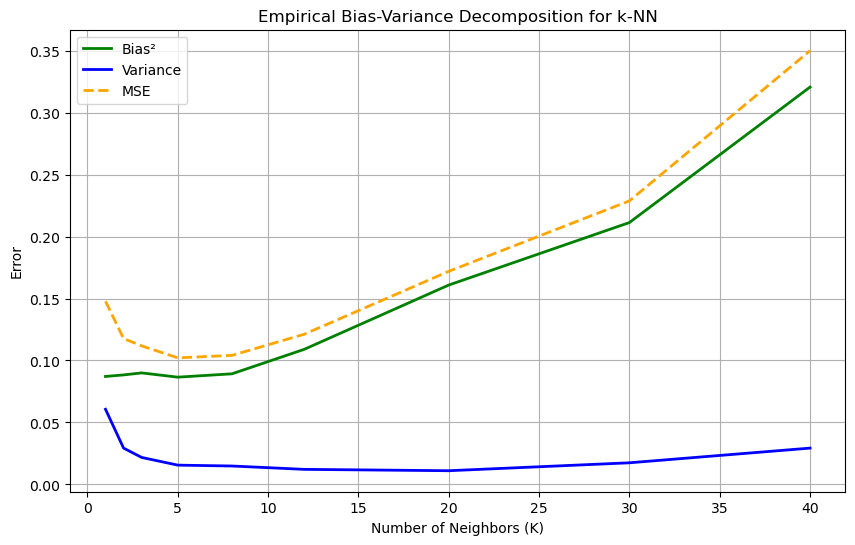

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

def generate_data(n=300, noise_scale=0.3, random_state=42):
    """
    יוצר סט נתונים סינתטי עבור בעיית רגרסיה חד-ממדית:
    y = 0.5*x + sin(x) + רעש
    """
    np.random.seed(random_state)
    X = np.linspace(0, 10, n)
    np.random.shuffle(X)  # מערבב את הערכים
    noise = noise_scale * np.random.randn(n)
    y = 0.5*X + np.sin(X) + noise
    X = X.reshape(-1, 1)  # הפיכת X לוקטור עמודה
    return X, y

def bias_variance_decomposition_demo(
    X, y,
    test_size=50,   # גודל סט הבדיקה
    train_size=100, # גודל סט האימון בכל חזרה
    repeats=30,     # מספר החזרות
    K_candidates=None,
    random_state=42
):
    """
    מדגים אמפירית את ה-Bias-Variance Decomposition עבור k-NN.
    מחזיר את ערכי ה-Bias^2, Variance ו-MSE לכל K, ומצייר גרף השוואה.
    """
    if K_candidates is None:
        K_candidates = [1, 2, 3, 5, 7, 10, 15, 20, 30]

    np.random.seed(random_state)
    
    # ערבוב נוסף של הנתונים למניעת הטיות
    idx = np.random.permutation(len(X))
    X, y = X[idx], y[idx]
    
    # חלוקה אקראית לסט בדיקה (Test) וסט "מאגר" (Pool) לאימון
    X_test = X[:test_size]
    y_test = y[:test_size]
    X_pool = X[test_size:]
    y_pool = y[test_size:]

    # נאגור כאן את התוצאות
    bias_list = []
    var_list = []
    mse_list = []

    # מעבר על כל K
    for K in K_candidates:
        # preds.shape -> (repeats, test_size)
        preds = []
        
        for r in range(repeats):
            # בכל חזרה נגריל train_size דגימות לאימון מתוך ה-Pool
            indices = np.random.choice(len(X_pool), size=train_size, replace=False)
            X_train = X_pool[indices]
            y_train = y_pool[indices]
            
            # מאמנים את המודל k-NN
            knn = KNeighborsRegressor(n_neighbors=K)
            knn.fit(X_train, y_train)
            
            # חיזוי על הסט הבדיקה (Test)
            y_pred = knn.predict(X_test)
            preds.append(y_pred)
        
        # הפיכה למערך numpy
        preds = np.array(preds)  # shape: (repeats, test_size)

        # ממוצע התחזיות לכל דגימה בסט הבדיקה (על פני repeats)
        mean_preds = np.mean(preds, axis=0)  # shape: (test_size,)

        # חישוב Bias^2
        # ממוצע הטעויות הריבועיות בין ממוצע התחזיות לערכים האמיתיים
        bias_squared = np.mean((mean_preds - y_test)**2)
        
        # חישוב Variance
        # ממוצע (על פני הדגימות בסט הבדיקה) של הפיזור של התחזיות סביב mean_preds
        variance = np.mean(np.mean((preds - mean_preds)**2, axis=0))
        
        # חישוב MSE בפועל
        # ממוצע הטעויות הריבועיות בין כל אחת מהתחזיות (בכל החזרות) לבין y_test
        mse = np.mean((preds - y_test)**2)
        
        bias_list.append(bias_squared)
        var_list.append(variance)
        mse_list.append(mse)

    # ציור גרף
    plt.figure(figsize=(10, 6))
    plt.plot(K_candidates, bias_list, label="Bias²", color="green", linewidth=2)
    plt.plot(K_candidates, var_list, label="Variance", color="blue", linewidth=2)
    plt.plot(K_candidates, mse_list, label="MSE", color="orange", linestyle="dashed", linewidth=2)
    
    plt.xlabel("Number of Neighbors (K)")
    plt.ylabel("Error")
    plt.title("Empirical Bias-Variance Decomposition for k-NN")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return np.array(bias_list), np.array(var_list), np.array(mse_list)

# הדגמה:
X, y = generate_data(n=400, noise_scale=0.3, random_state=123)
bias_vals, var_vals, mse_vals = bias_variance_decomposition_demo(
    X, y, 
    test_size=60,      # נשתמש ב-60 דוגמאות כסט בדיקה
    train_size=100,    # בכל חזרה נשתמש ב-100 דוגמאות לאימון
    repeats=40,        # נגדיל מעט את מספר החזרות
    K_candidates=[1, 2, 3, 5, 8, 12, 20, 30, 40],
    random_state=123
)

## י 📌 $Bias-Variance$ Tradeoff ברגרסיה ולמידת מכונה י  

## **📌 י תופעת ה-“U-shape” של $MSE$ י**  
י הגרף ממחיש את **תופעת ה-“U-shape”**, שבה **$MSE$ יורד ואז מתחיל לעלות**, ומראה את החשיבות של איזון **הטיה-שונות** בבחירת הפרמטרים המתאימים, כמו **$k$ ב-$KNN$ או $\lambda$ ב-$LLR$**. י  

---

## **📌 י איך להתמודד עם $Bias-Variance$ Tradeoff? י**  

### 🔹 **י הקטנת הטיה:** י  
- י הגדלת מורכבות המודל (למשל, שימוש ברגרסיה פולינומית). י  
- י הקטנת **$k$** ב-$KNN$ (יותר שכנים קרובים → הטיה נמוכה יותר). י  

### 🔹 **י הקטנת שונות:** י  
- י שימוש במודלים פשוטים יותר. י  
- י הגדלת **$k$** ב-$KNN$ (פחות רגישות לרעש, החלקה טובה יותר). י  
- י קרוס-ולידציה כדי לוודא שהתוצאות **יציבות**. י  

---

## **📌 י בחירה אופטימלית של $k$ ו- $\lambda$ ברגרסיה ליניארית מקומית $(LLR)$ י**  
| **י פרמטר י** | **י השפעה י** |
|-----------|-----------|
| **י $k$ נמוך י** | י גמישות גבוהה, אך רגישות לרעש $(Overfitting)$ י |
| **י $k$ גבוה י** | י החלקה טובה, אך אובדן מידע על מבנים קטנים $(Underfitting)$ י |

---

## **📌 י סיכום י**  
✔ **י ה-$MSE$ מורכב מהטיה, שונות ושגיאה בלתי ניתנת להפחתה. י**  
✔ **י איזון $Bias-Variance$ קריטי כדי למנוע $Overfitting$ ולמידת חסר. י**  
✔ **י $KNN$ מדגים את האיזון הזה** – עם **$k$ קטן** יש שונות גבוהה, ועם **$k$ גדול** יש הטיה גבוהה. י  
✔ י ניתן לשלוט **בהטיה-שונות** דרך **קרוס-ולידציה, בחירת משתנים ומורכבות המודל**. י  

📌 **י הבנת ה-$Bias-Variance$ Tradeoff מאפשרת לנו לבנות מודלים יציבים ומדויקים יותר! 🚀 י**  

---